# 1. Understand and Preprocess the Data

## 1.1. Load the Data

In [124]:
import pandas as pd

train_df = pd.read_csv('train_kaggle.csv')
test_df = pd.read_csv('test_kaggle.csv')

<ipython-input-124-fd7519955f06>:3: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('train_kaggle.csv')


## 1.2. Explore the Data

In [125]:
print(train_df.info())
print(train_df.describe())
print(train_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774155 entries, 0 to 774154
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Customer_ID       774153 non-null  float64
 1   outlet_city       774153 non-null  object 
 2   luxury_sales      774120 non-null  object 
 3   fresh_sales       774114 non-null  object 
 4   dry_sales         774125 non-null  object 
 5   cluster_catgeory  774154 non-null  object 
dtypes: float64(1), object(5)
memory usage: 35.4+ MB
None
        Customer_ID
count  7.741530e+05
mean   1.038708e+07
std    2.234795e+05
min    1.000000e+07
25%    1.019354e+07
50%    1.038708e+07
75%    1.058062e+07
max    1.077415e+07
   Customer_ID outlet_city luxury_sales fresh_sales dry_sales cluster_catgeory
0   10493832.0    Kelaniya       1209.6       756.0    5292.0                4
1   10178643.0    Moratuwa      1590.12     1060.08   6007.12                1
2   10513916.0     Wattala     

In [126]:
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40749 entries, 0 to 40748
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Customer_ID   40749 non-null  int64 
 1   outlet_city   40749 non-null  object
 2   luxury_sales  40749 non-null  object
 3   fresh_sales   40749 non-null  object
 4   dry_sales     40749 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.6+ MB
None


In [127]:
train_df.isnull().sum()

Customer_ID          2
outlet_city          2
luxury_sales        35
fresh_sales         41
dry_sales           30
cluster_catgeory     1
dtype: int64

In [128]:
# Check the data types of each column
column_data_types_train = train_df.dtypes

# Display the data types
print("Data types of each column:")
print(column_data_types_train)

Data types of each column:
Customer_ID         float64
outlet_city          object
luxury_sales         object
fresh_sales          object
dry_sales            object
cluster_catgeory     object
dtype: object


In [129]:
# Select rows with any null values
rows_with_null = train_df[train_df.isnull().any(axis=1)]

# Display rows with null values
print(rows_with_null)

        Customer_ID             outlet_city luxury_sales fresh_sales  \
4234     10101878.0  Dehiwala-Mount Lavinia          NaN     1686.36   
4326     10531406.0                Kaduwela        925.8         NaN   
4327     10311229.0                Panadura         2374         NaN   
4333     10361798.0                   Kotte          NaN         NaN   
4929     10414692.0                Kaduwela       1780.8         NaN   
...             ...                     ...          ...         ...   
754304   10006333.0              Batticaloa      3932.66         NaN   
754306   10726566.0                  Jaffna      2728.95     2417.07   
755630   10537627.0                 Gampaha          NaN     5371.37   
765777   10499622.0              Katunayake      5315.57         NaN   
774147   10493702.0              Katunayake      2624.65      2249.7   

       dry_sales cluster_catgeory  
4234     9556.04                4  
4326      4011.8                4  
4327      7715.5           

In [130]:
# Select rows where Customer_ID column has null values
rows_with_null_customer_id = train_df[train_df['Customer_ID'].isnull()]

# Display rows with null values in the Customer_ID column
print(rows_with_null_customer_id)

        Customer_ID  outlet_city luxury_sales fresh_sales dry_sales  \
497678          NaN  Trincomalee       1682.2      2588.0    8411.0   
497698          NaN       Jaffna       807.82     1118.52    4039.1   

       cluster_catgeory  
497678                1  
497698                1  


In [131]:
# Select rows where outlet_city column has null values
rows_with_null_outlet_city = train_df[train_df['outlet_city'].isnull()]

# Display rows with null values in the outlet_city column
print(rows_with_null_outlet_city)

        Customer_ID outlet_city luxury_sales fresh_sales dry_sales  \
497599   10387530.0         NaN      1309.36     1611.52   6848.96   
497703   10107604.0         NaN       1576.5      1891.8    7041.7   

       cluster_catgeory  
497599                1  
497703                1  


In [132]:
# Select rows where cluster_catgeory column has null values
rows_with_null_cluster_catgeory = train_df[train_df['cluster_catgeory'].isnull()]

# Display rows with null values in the cluster_catgeory column
print(rows_with_null_cluster_catgeory)

        Customer_ID outlet_city luxury_sales fresh_sales dry_sales  \
555560   10158111.0    Kalmunai      1730.52     2451.57   9662.07   

       cluster_catgeory  
555560              NaN  


In [133]:
# Check for duplicates in Customer_ID column
duplicates = train_df.duplicated(subset=['Customer_ID'], keep=False)

# Select rows where duplicates exist in Customer_ID column
duplicate_rows = train_df[duplicates]

# Display rows with duplicate Customer_ID values
print(duplicate_rows)

        Customer_ID  outlet_city luxury_sales fresh_sales dry_sales  \
497678          NaN  Trincomalee       1682.2      2588.0    8411.0   
497698          NaN       Jaffna       807.82     1118.52    4039.1   

       cluster_catgeory  
497678                1  
497698                1  


In [134]:
# Find the maximum and minimum values of the Customer_ID column
max_customer_id = train_df['Customer_ID'].max()
min_customer_id = train_df['Customer_ID'].min()

# Print the maximum and minimum values
print("Max Customer_ID:", max_customer_id)
print("Min Customer_ID:", min_customer_id)

Max Customer_ID: 10774154.0
Min Customer_ID: 10000000.0


In [135]:
# Get unique Customer_ID values from train and test DataFrames
train_customer_ids = set(train_df['Customer_ID'])
test_customer_ids = set(test_df['Customer_ID'])

# Find the intersection of unique Customer_ID values
common_customer_ids = train_customer_ids.intersection(test_customer_ids)

if common_customer_ids:
    print("Common Customer_IDs between train and test DataFrames:", common_customer_ids)
else:
    print("There are no common Customer_IDs between train and test DataFrames.")

There are no common Customer_IDs between train and test DataFrames.


In [136]:
# Specify columns to check
columns_to_check = ['luxury_sales', 'fresh_sales', 'dry_sales']

# Find rows where any of the specified columns have a value of 0
rows_with_zero_values = train_df[(train_df[columns_to_check] == 0).any(axis=1)]

# Display rows with 0 values in any of the specified columns
print(rows_with_zero_values)

Empty DataFrame
Columns: [Customer_ID, outlet_city, luxury_sales, fresh_sales, dry_sales, cluster_catgeory]
Index: []


In [137]:
# Specify columns to check
columns_to_check = ['luxury_sales', 'fresh_sales', 'dry_sales']

# Convert columns to numeric, coercing errors (turning non-convertible values into NaN)
for column in columns_to_check:
    train_df[column] = pd.to_numeric(train_df[column], errors='coerce')

# Find rows where any of the specified columns have a negative value
rows_with_negative_values = train_df[(train_df[columns_to_check] < 0).any(axis=1)]

# Display rows with negative values in any of the specified columns
print(rows_with_negative_values)

Empty DataFrame
Columns: [Customer_ID, outlet_city, luxury_sales, fresh_sales, dry_sales, cluster_catgeory]
Index: []


In [138]:
# Unique values in outlet_city column
unique_outlet_city_train = train_df['outlet_city'].unique()

# Unique values in cluster_category column
unique_cluster_category = train_df['cluster_catgeory'].unique()

# Display unique values
print("Unique values in outlet_city column:", unique_outlet_city_train)
print("Unique values in cluster_category column:", unique_cluster_category)

Unique values in outlet_city column: ['Kelaniya' 'Moratuwa' 'Wattala' 'Homagama' 'Dehiwala-Mount Lavinia'
 'Panadura' 'Kaduwela' 'Peliyagoda' 'Kotte' 'Nuwara Eliya' 'Batticaloa'
 'Colombo' 'Jaffna' 'Gampaha' 'Kalmunai' 'Galle' 'Katunayake' 'Negombo'
 'Trincomalee' 'Kandy' nan]
Unique values in cluster_category column: ['4' '1' '99' '2' '5' '3' '6' '6\\' 4 2 1 95 3 98 5 6 nan 100.0 89.0]


In [139]:
test_df.isnull().sum()

Customer_ID     0
outlet_city     0
luxury_sales    0
fresh_sales     0
dry_sales       0
dtype: int64

In [140]:
# Check the data types of each column
column_data_types_test = test_df.dtypes

# Display the data types
print("Data types of each column:")
print(column_data_types_test)

Data types of each column:
Customer_ID      int64
outlet_city     object
luxury_sales    object
fresh_sales     object
dry_sales       object
dtype: object


In [141]:
# Unique values in outlet_city column
unique_outlet_city_test = test_df['outlet_city'].unique()

# Display unique values
print("Unique values in outlet_city column:", unique_outlet_city_test)

Unique values in outlet_city column: ['batticaloa' 'Batticaloa' 'Colombo' 'Dehiwala-Mount Lavinia'
 'Anuradhapura' 'Galle' 'Gampaha' 'Homagama' 'Jaffna' 'Kaduwela'
 'Kalmunai' 'kalmunai' 'Kandy' 'Katunayake' 'Kelaniya' 'Madawachiya'
 'Kotte' 'Moratuwa' 'MoraTuwa' 'Negombo' 'Nuwara Eliya' 'Panadura'
 'Peliyagoda' 'PeliyagodA' 'Trincomale' 'Trincomalee' 'Wattala']


## 1.3. Data Preprocessing

### 1.3.1. Data Cleaning

#### 1.3.1.1. Sales Columns

##### Train Dataset

In [142]:
# Check unique data types in the luxury_sales column
print("Unique data types in luxury_sales column:", train_df['luxury_sales'].apply(type).unique())
print("Unique data types in fresh_sales column:", train_df['fresh_sales'].apply(type).unique())
print("Unique data types in dry_sales column:", train_df['dry_sales'].apply(type).unique())

Unique data types in luxury_sales column: [<class 'float'>]
Unique data types in fresh_sales column: [<class 'float'>]
Unique data types in dry_sales column: [<class 'float'>]


In [143]:
# Filter the luxury_sales column for string type values
str_values_luxury_sales_train = train_df['luxury_sales'][train_df['luxury_sales'].apply(lambda x: isinstance(x, str))]

# Print unique string type values
print("Unique string type values in luxury_sales column:", str_values_luxury_sales_train.unique())

Unique string type values in luxury_sales column: []


In [144]:
# Filter the fresh_sales column for string type values
str_values_fresh_sales_train = train_df['fresh_sales'][train_df['fresh_sales'].apply(lambda x: isinstance(x, str))]

# Print unique string type values
print("Unique string type values in frtesh_sales column:", str_values_fresh_sales_train.unique())

Unique string type values in frtesh_sales column: []


In [145]:
# Filter the dry_sales column for string type values
str_values_dry_sales_train = train_df['dry_sales'][train_df['dry_sales'].apply(lambda x: isinstance(x, str))]

# Print unique string type values
print("Unique string type values in dry_sales column:", str_values_dry_sales_train.unique())

Unique string type values in dry_sales column: []


In [146]:
# Convert string values in the luxury_sales column to float
for i, value in enumerate(train_df['luxury_sales']):
    try:
        train_df.at[i, 'luxury_sales'] = float(value)
    except ValueError:
        pass

# Filter the luxury_sales column for string type values
str_values_luxury_sales_train = train_df['luxury_sales'][train_df['luxury_sales'].apply(lambda x: isinstance(x, str))]

# Print unique string type values
print("Unique string type values in luxury_sales column:", str_values_luxury_sales_train.unique())

Unique string type values in luxury_sales column: []


In [147]:
# Mapping dictionary for textual representations of numbers to their numeric equivalents
text_to_numeric_luxury = {
    'nul': 0,
    'One thousand four hundread ruppes': 1400,
    'Eight hundread ruppess': 800,
    'six hundread and hirty ': 630,  # Assuming it's meant to be 'six hundred and thirty'
    'Thousand tow hundread ': 1200,  # Assuming it's meant to be 'Thousand two hundred'
    'seven hundread and nine ruppees': 709,
    'Three thousand two hundread ruppess': 3200,
    'Four thousand one hundread ruppess': 4100
}

# Convert textual representations of numbers into numeric values
train_df['luxury_sales'] = train_df['luxury_sales'].replace(text_to_numeric_luxury)

# Filter the luxury_sales column for string type values
str_values_luxury_sales_train = train_df['luxury_sales'][train_df['luxury_sales'].apply(lambda x: isinstance(x, str))]

# Print unique string type values
print("Unique string type values in luxury_sales column:", str_values_luxury_sales_train.unique())

Unique string type values in luxury_sales column: []


In [148]:
# Convert string values in the fresh_sales column to float
for i, value in enumerate(train_df['fresh_sales']):
    try:
        train_df.at[i, 'fresh_sales'] = float(value)
    except ValueError:
        pass

# Filter the fresh_sales column for string type values
str_values_fresh_sales_train = train_df['fresh_sales'][train_df['fresh_sales'].apply(lambda x: isinstance(x, str))]

# Print unique string type values
print("Unique string type values in fresh_sales column:", str_values_fresh_sales_train.unique())

Unique string type values in fresh_sales column: []


In [149]:
# Mapping dictionary for textual representations of numbers to their numeric equivalents
text_to_numeric_fresh = {
    'nul': 0,
    'Six hundread and five ruppes': 605,
    'Three thousana and five hundread': 3500,
    'thirteen thousand ruppes': 13000,
    'Five thousand ruppes': 500,
    'Two thousand seven hundread ruppess': 2700
}

# Convert textual representations of numbers into numeric values
train_df['fresh_sales'] = train_df['fresh_sales'].replace(text_to_numeric_fresh)

# Filter the fresh_sales column for string type values
str_values_fresh_sales_train = train_df['fresh_sales'][train_df['fresh_sales'].apply(lambda x: isinstance(x, str))]

# Print unique string type values
print("Unique string type values in fresh_sales column:", str_values_fresh_sales_train.unique())

Unique string type values in fresh_sales column: []


In [150]:
# Convert string values in the dry_sales column to float
for i, value in enumerate(train_df['dry_sales']):
    try:
        train_df.at[i, 'dry_sales'] = float(value)
    except ValueError:
        pass

# Filter the dry_sales column for string type values
str_values_dry_sales_train = train_df['dry_sales'][train_df['dry_sales'].apply(lambda x: isinstance(x, str))]

# Print unique string type values
print("Unique string type values in dry_sales column:", str_values_dry_sales_train.unique())

Unique string type values in dry_sales column: []


In [151]:
# Mapping dictionary for textual representations of numbers to their numeric equivalents
text_to_numeric_dry = {
    'nul': 0,
    'Four thousand and two hundread ruppes': 4200
}

# Convert textual representations of numbers into numeric values
train_df['dry_sales'] = train_df['dry_sales'].replace(text_to_numeric_dry)

# Filter the dry_sales column for string type values
str_values_dry_sales_train = train_df['dry_sales'][train_df['dry_sales'].apply(lambda x: isinstance(x, str))]

# Print unique string type values
print("Unique string type values in dry_sales column:", str_values_dry_sales_train.unique())

Unique string type values in dry_sales column: []


In [152]:
# Check unique data types in the luxury_sales column
print("Unique data types in luxury_sales column:", train_df['luxury_sales'].apply(type).unique())
print("Unique data types in fresh_sales column:", train_df['fresh_sales'].apply(type).unique())
print("Unique data types in dry_sales column:", train_df['dry_sales'].apply(type).unique())

Unique data types in luxury_sales column: [<class 'float'>]
Unique data types in fresh_sales column: [<class 'float'>]
Unique data types in dry_sales column: [<class 'float'>]


##### Test Dataset

In [153]:
# Check unique data types in the luxury_sales column
print("Unique data types in luxury_sales column:", test_df['luxury_sales'].apply(type).unique())
print("Unique data types in fresh_sales column:", test_df['fresh_sales'].apply(type).unique())
print("Unique data types in dry_sales column:", test_df['dry_sales'].apply(type).unique())

Unique data types in luxury_sales column: [<class 'str'>]
Unique data types in fresh_sales column: [<class 'str'>]
Unique data types in dry_sales column: [<class 'str'>]


In [154]:
# Convert string values in the luxury_sales column to float
for i, value in enumerate(test_df['luxury_sales']):
    try:
        test_df.at[i, 'luxury_sales'] = float(value)
    except ValueError:
        pass

# Filter the luxury_sales column for string type values
str_values_luxury_sales_test = test_df['luxury_sales'][test_df['luxury_sales'].apply(lambda x: isinstance(x, str))]

# Print unique string type values
print("Unique string type values in luxury_sales column:", str_values_luxury_sales_test.unique())

Unique string type values in luxury_sales column: ['Seven Hundread and sixty Ruppees' 'Eight Hundread and fifteen ruppes']


In [155]:
# Mapping dictionary for textual representations of numbers to their numeric equivalents
text_to_numeric_luxury = {
    'Seven Hundread and sixty Ruppees': 760,
    'Eight Hundread and fifteen ruppes': 815
}

# Convert textual representations of numbers into numeric values
test_df['luxury_sales'] = test_df['luxury_sales'].replace(text_to_numeric_luxury)

# Filter the luxury_sales column for string type values
str_values_luxury_sales_test = test_df['luxury_sales'][test_df['luxury_sales'].apply(lambda x: isinstance(x, str))]

# Print unique string type values
print("Unique string type values in luxury_sales column:", str_values_luxury_sales_test.unique())

Unique string type values in luxury_sales column: []


In [156]:
# Convert string values in the fresh_sales column to float
for i, value in enumerate(test_df['fresh_sales']):
    try:
        test_df.at[i, 'fresh_sales'] = float(value)
    except ValueError:
        pass

# Filter the fresh_sales column for string type values
str_values_fresh_sales_test = test_df['fresh_sales'][test_df['fresh_sales'].apply(lambda x: isinstance(x, str))]

# Print unique string type values
print("Unique string type values in fresh_sales column:", str_values_fresh_sales_test.unique())

Unique string type values in fresh_sales column: ['Nine thousand ruppess']


In [157]:
# Mapping dictionary for textual representations of numbers to their numeric equivalents
text_to_numeric_fresh = {
    'Nine thousand ruppess': 9000
}

# Convert textual representations of numbers into numeric values
test_df['fresh_sales'] = test_df['fresh_sales'].replace(text_to_numeric_fresh)

# Filter the fresh_sales column for string type values
str_values_fresh_sales_test = test_df['fresh_sales'][test_df['fresh_sales'].apply(lambda x: isinstance(x, str))]

# Print unique string type values
print("Unique string type values in fresh_sales column:", str_values_luxury_sales_test.unique())

Unique string type values in fresh_sales column: []


In [158]:
# Convert string values in the dry_sales column to float
for i, value in enumerate(test_df['dry_sales']):
    try:
        test_df.at[i, 'dry_sales'] = float(value)
    except ValueError:
        pass

# Filter the dry_sales column for string type values
str_values_dry_sales_test = test_df['dry_sales'][test_df['dry_sales'].apply(lambda x: isinstance(x, str))]

# Print unique string type values
print("Unique string type values in dry_sales column:", str_values_dry_sales_test.unique())

Unique string type values in dry_sales column: ['Three Thousand seven hundread ruppees']


In [159]:
# Mapping dictionary for textual representations of numbers to their numeric equivalents
text_to_numeric_dry = {
    'Three Thousand seven hundread ruppees': 3700
}

# Convert textual representations of numbers into numeric values
test_df['dry_sales'] = test_df['dry_sales'].replace(text_to_numeric_dry)

# Filter the dry_sales column for string type values
str_values_dry_sales_test = test_df['dry_sales'][test_df['dry_sales'].apply(lambda x: isinstance(x, str))]

# Print unique string type values
print("Unique string type values in dry_sales column:", str_values_dry_sales_test.unique())

Unique string type values in dry_sales column: []


In [160]:
# Check unique data types in the luxury_sales column
print("Unique data types in luxury_sales column:", test_df['luxury_sales'].apply(type).unique())
print("Unique data types in fresh_sales column:", test_df['fresh_sales'].apply(type).unique())
print("Unique data types in dry_sales column:", test_df['dry_sales'].apply(type).unique())

Unique data types in luxury_sales column: [<class 'float'>]
Unique data types in fresh_sales column: [<class 'float'>]
Unique data types in dry_sales column: [<class 'float'>]


#### 1.3.1.2. Outlet City Column

In [161]:
# Unique values in outlet_city column
print("Unique values in outlet_city column in Train Dataset:", train_df['outlet_city'].unique())
print("Unique values in outlet_city column in Test Dataset:", test_df['outlet_city'].unique())

Unique values in outlet_city column in Train Dataset: ['Kelaniya' 'Moratuwa' 'Wattala' 'Homagama' 'Dehiwala-Mount Lavinia'
 'Panadura' 'Kaduwela' 'Peliyagoda' 'Kotte' 'Nuwara Eliya' 'Batticaloa'
 'Colombo' 'Jaffna' 'Gampaha' 'Kalmunai' 'Galle' 'Katunayake' 'Negombo'
 'Trincomalee' 'Kandy' nan]
Unique values in outlet_city column in Test Dataset: ['batticaloa' 'Batticaloa' 'Colombo' 'Dehiwala-Mount Lavinia'
 'Anuradhapura' 'Galle' 'Gampaha' 'Homagama' 'Jaffna' 'Kaduwela'
 'Kalmunai' 'kalmunai' 'Kandy' 'Katunayake' 'Kelaniya' 'Madawachiya'
 'Kotte' 'Moratuwa' 'MoraTuwa' 'Negombo' 'Nuwara Eliya' 'Panadura'
 'Peliyagoda' 'PeliyagodA' 'Trincomale' 'Trincomalee' 'Wattala']


In [162]:
# Get unique outlet_city values from train and test DataFrames
train_outlet_citys = set(train_df['outlet_city'])
test_outlet_citys = set(test_df['outlet_city'])

# Find the difference of unique outlet_city values
different_outlet_citys = (train_outlet_citys.union(test_outlet_citys)).difference(train_outlet_citys.intersection(test_outlet_citys))

if different_outlet_citys:
    print("Different outlet_citys between train and test DataFrames:", different_outlet_citys)
else:
    print("There are no different outlet_citys between train and test DataFrames.")

Different outlet_citys between train and test DataFrames: {'PeliyagodA', 'Madawachiya', 'batticaloa', 'Anuradhapura', 'MoraTuwa', nan, 'Trincomale', 'kalmunai'}


In [163]:
# Mapping dictionary for fixing typos in the outlet_city column
typo_fix_dict_train = {
    'Colomb': 'Colombo'
}

# Convert typos in the outlet_city column
train_df['outlet_city'] = train_df['outlet_city'].replace(typo_fix_dict_train)

# Mapping dictionary for fixing typos in the outlet_city column
typo_fix_dict = {
    'Trincomale': 'Trincomalee',
    'MoraTuwa': 'Moratuwa',
    'PeliyagodA': 'Peliyagoda',
    'batticaloa': 'Batticaloa',
    'kalmunai': 'Kalmunai',
    'Madawachiya': 'Madawachchiya'
}

# Convert typos in the outlet_city column
test_df['outlet_city'] = test_df['outlet_city'].replace(typo_fix_dict)

# Get unique outlet_city values from train and test DataFrames
train_outlet_citys = set(train_df['outlet_city'])
test_outlet_citys = set(test_df['outlet_city'])

# Find the difference of unique outlet_city values
different_outlet_citys = (train_outlet_citys.union(test_outlet_citys)).difference(train_outlet_citys.intersection(test_outlet_citys))

if different_outlet_citys:
    print("Different outlet_citys between train and test DataFrames:", different_outlet_citys)
else:
    print("There are no different outlet_citys between train and test DataFrames.")

Different outlet_citys between train and test DataFrames: {'Anuradhapura', 'Madawachchiya', nan}


In [164]:
# Unique values in outlet_city column
print("Unique values in outlet_city column in Train Dataset:", train_df['outlet_city'].unique())
print("Unique values in outlet_city column in Test Dataset:", test_df['outlet_city'].unique())

Unique values in outlet_city column in Train Dataset: ['Kelaniya' 'Moratuwa' 'Wattala' 'Homagama' 'Dehiwala-Mount Lavinia'
 'Panadura' 'Kaduwela' 'Peliyagoda' 'Kotte' 'Nuwara Eliya' 'Batticaloa'
 'Colombo' 'Jaffna' 'Gampaha' 'Kalmunai' 'Galle' 'Katunayake' 'Negombo'
 'Trincomalee' 'Kandy' nan]
Unique values in outlet_city column in Test Dataset: ['Batticaloa' 'Colombo' 'Dehiwala-Mount Lavinia' 'Anuradhapura' 'Galle'
 'Gampaha' 'Homagama' 'Jaffna' 'Kaduwela' 'Kalmunai' 'Kandy' 'Katunayake'
 'Kelaniya' 'Madawachchiya' 'Kotte' 'Moratuwa' 'Negombo' 'Nuwara Eliya'
 'Panadura' 'Peliyagoda' 'Trincomalee' 'Wattala']


#### 1.3.1.3 Cluster Category Column

In [165]:
# Rename the column from "cluster_catgeory" to "cluster_category"
train_df.rename(columns={'cluster_catgeory': 'cluster_category'}, inplace=True)

# Display the DataFrame to verify the change
print(train_df.head())

   Customer_ID outlet_city  luxury_sales  fresh_sales  dry_sales  \
0   10493832.0    Kelaniya       1209.60       756.00    5292.00   
1   10178643.0    Moratuwa       1590.12      1060.08    6007.12   
2   10513916.0     Wattala       2288.88      1481.04    9155.52   
3   10334589.0     Wattala       2274.94      1739.66    9099.76   
4   10458365.0    Kelaniya       2345.49      2069.55    9243.99   

  cluster_category  
0                4  
1                1  
2                4  
3                4  
4                4  


In [166]:
# Unique values in cluster_category column
print("Unique values in cluster_category column:", train_df['cluster_category'].unique())

Unique values in cluster_category column: ['4' '1' '99' '2' '5' '3' '6' '6\\' 4 2 1 95 3 98 5 6 nan 100.0 89.0]


In [167]:
# Convert string values in the cluster_category column to float
for i, value in enumerate(train_df['cluster_category']):
    try:
        train_df.at[i, 'cluster_category'] = int(value)
    except ValueError:
        pass

# Filter the cluster_category column for string type values
str_values_cluster_category = train_df['cluster_category'][train_df['cluster_category'].apply(lambda x: isinstance(x, str))]

# Print unique string type values
print("Unique string type values in cluster_category column:", str_values_cluster_category.unique())

Unique string type values in cluster_category column: ['6\\']


In [168]:
# Fix typo in the cluster_category column
train_df['cluster_category'] = train_df['cluster_category'].replace({"6\\": 6})

In [169]:
# Unique values in cluster_category column
print("Unique values in cluster_category column:", train_df['cluster_category'].unique())

Unique values in cluster_category column: [  4.   1.  99.   2.   5.   3.   6.  95.  98.  nan 100.  89.]


In [170]:
# Set values greater than 6 in the cluster_category column to null
train_df.loc[train_df['cluster_category'].astype(float) > 6, 'cluster_category'] = None

# Unique values in cluster_category column
print("Unique values in cluster_category column:", train_df['cluster_category'].unique())

Unique values in cluster_category column: [ 4.  1. nan  2.  5.  3.  6.]


In [171]:
train_df.isnull().sum()

Customer_ID          2
outlet_city          2
luxury_sales        45
fresh_sales         50
dry_sales           38
cluster_category     6
dtype: int64

### 1.3.2. Handle Missing Values

In [172]:
# Fill null values with 0 in specific columns
columns_to_fill = ['luxury_sales', 'fresh_sales', 'dry_sales']
train_df[columns_to_fill] = train_df[columns_to_fill].fillna(0)

In [173]:
# Find rows with missing Customer_ID
missing_customer_id = train_df['Customer_ID'].isnull()

# Generate unique IDs for missing values
new_ids = range(10774155, 10774155 + missing_customer_id.sum())

# Assign new IDs to missing values
train_df.loc[missing_customer_id, 'Customer_ID'] = new_ids

In [174]:
train_df.isnull().sum()

Customer_ID         0
outlet_city         2
luxury_sales        0
fresh_sales         0
dry_sales           0
cluster_category    6
dtype: int64

In [175]:
# Drop values with missing data
train_df = train_df.dropna()

In [176]:
train_df.isnull().sum()

Customer_ID         0
outlet_city         0
luxury_sales        0
fresh_sales         0
dry_sales           0
cluster_category    0
dtype: int64

In [177]:
train_df.dtypes

Customer_ID         float64
outlet_city          object
luxury_sales        float64
fresh_sales         float64
dry_sales           float64
cluster_category    float64
dtype: object

### 1.3.3. Outlier Handling

In [178]:
# Calculate the IQR for each column
Q1 = train_df[['luxury_sales', 'fresh_sales', 'dry_sales']].quantile(0.25)
Q3 = train_df[['luxury_sales', 'fresh_sales', 'dry_sales']].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = ((train_df[['luxury_sales', 'fresh_sales', 'dry_sales']] < (Q1 - 1.5 * IQR)) |
            (train_df[['luxury_sales', 'fresh_sales', 'dry_sales']] > (Q3 + 1.5 * IQR)))

# Display the outliers
print("Outliers:")
print(outliers.sum())

Outliers:
luxury_sales    35055
fresh_sales         0
dry_sales           0
dtype: int64


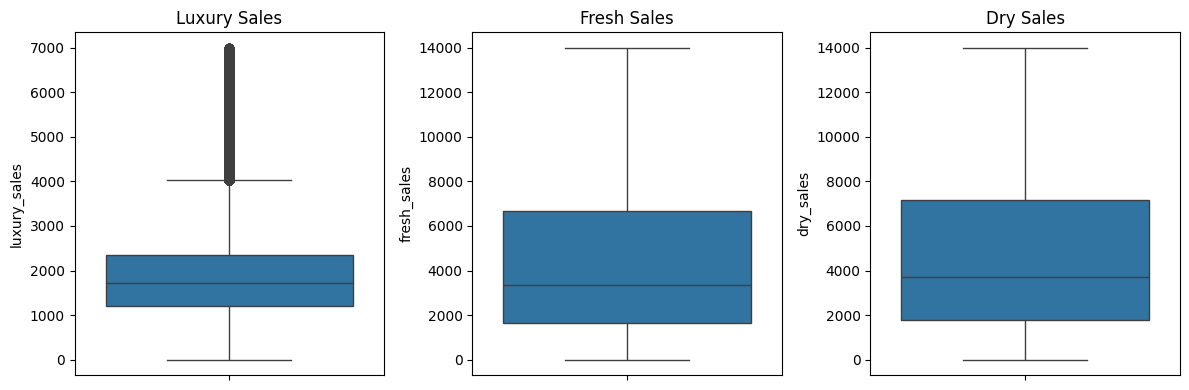

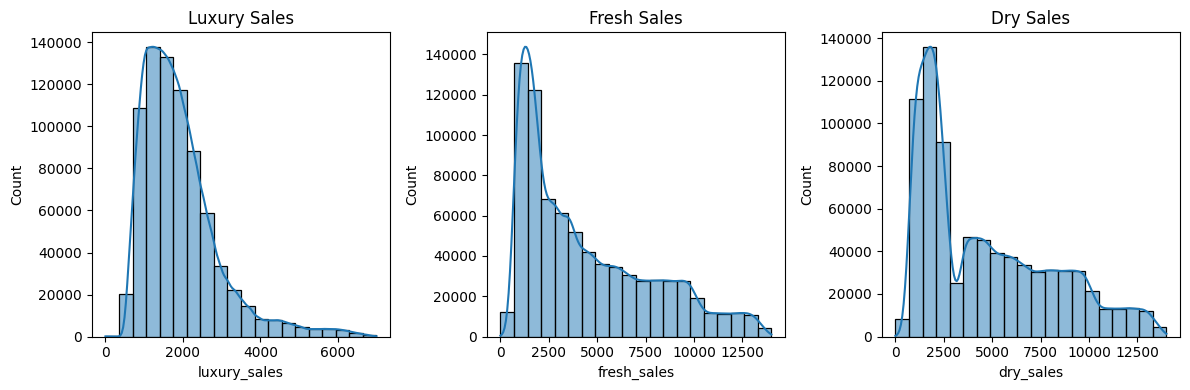

In [179]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots for box plots
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.boxplot(data=train_df['luxury_sales'])
plt.title('Luxury Sales')

plt.subplot(1, 3, 2)
sns.boxplot(data=train_df['fresh_sales'])
plt.title('Fresh Sales')

plt.subplot(1, 3, 3)
sns.boxplot(data=train_df['dry_sales'])
plt.title('Dry Sales')

plt.tight_layout()
plt.show()

# Create subplots for histograms
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.histplot(train_df['luxury_sales'], bins=20, kde=True)
plt.title('Luxury Sales')

plt.subplot(1, 3, 2)
sns.histplot(train_df['fresh_sales'], bins=20, kde=True)
plt.title('Fresh Sales')

plt.subplot(1, 3, 3)
sns.histplot(train_df['dry_sales'], bins=20, kde=True)
plt.title('Dry Sales')

plt.tight_layout()
plt.show()

### 1.3.4. Feature Engineering

#### Adding a city_cluster column to be fit with Anuradhapura and Madawachiya

In [180]:
# Count rows where outlet_city values are 'Madawachiya' or 'Anuradhapura'
count_madawachchiya = (test_df['outlet_city'] == 'Madawachchiya').sum()
count_anuradhapura = (test_df['outlet_city'] == 'Anuradhapura').sum()

# Display the counts
print("Count of rows where outlet city is 'Madawachchiya':", count_madawachchiya)
print("Count of rows where outlet city is 'Anuradhapura':", count_anuradhapura)

Count of rows where outlet city is 'Madawachchiya': 1499
Count of rows where outlet city is 'Anuradhapura': 1645


In [181]:
# Group train_df by outlet_city and calculate the average of luxury_sales, fresh_sales, and dry_sales
city_cluster_df_train = train_df.groupby('outlet_city')[['luxury_sales', 'fresh_sales', 'dry_sales']].mean().reset_index()

# Display the new DataFrame
city_cluster_df_train

,outlet_city,luxury_sales,fresh_sales,dry_sales
0,Batticaloa,2127.741357,5025.618562,5053.892738
1,Colombo,2124.722036,5016.782454,5040.733917
2,Dehiwala-Mount Lavinia,1692.615799,3791.402798,4245.295096
3,Galle,2126.907706,5011.892306,5067.996582
4,Gampaha,2115.833253,4983.363756,5062.142283
5,Homagama,1698.791444,3783.255898,4257.035330
6,Jaffna,2124.764573,5019.505535,5043.694600
7,Kaduwela,1698.207052,3784.643189,4279.350221
8,Kalmunai,2114.864944,5009.285972,5039.080322
9,Kandy,2123.349695,5012.833610,5064.110827


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

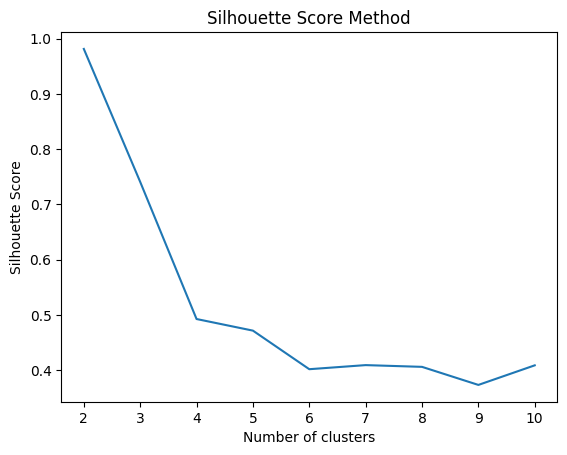

In [182]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Select features for clustering
features = city_cluster_df_train[['luxury_sales', 'fresh_sales', 'dry_sales']]

# Scale features if necessary (optional but can improve clustering performance)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# assuming 'data' is our multidimensional data
scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k).fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    scores.append(score)

plt.plot(range(2, 11), scores)
plt.title('Silhouette Score Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [183]:
from sklearn.cluster import KMeans

# Select features for clustering
features = city_cluster_df_train[['luxury_sales', 'fresh_sales', 'dry_sales']]

# Scale features if necessary (optional but can improve clustering performance)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Define the number of clusters
num_clusters = 2

# Apply K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)

# Assign cluster labels to outlet cities
city_cluster_df_train['cluster_label'] = cluster_labels

# Iterate over each cluster label
for label in range(num_clusters):
    # Filter DataFrame for each cluster label
    cluster_df = city_cluster_df_train[city_cluster_df_train['cluster_label'] == label]
    # Extract unique cities under the current cluster label
    unique_cities = cluster_df['outlet_city'].unique()
    # Print the unique cities for the current cluster label
    print(f"Unique cities under Cluster {label}: {unique_cities}")


Unique cities under Cluster 0: ['Batticaloa' 'Colombo' 'Galle' 'Gampaha' 'Jaffna' 'Kalmunai' 'Kandy'
 'Katunayake' 'Negombo' 'Trincomalee']
Unique cities under Cluster 1: ['Dehiwala-Mount Lavinia' 'Homagama' 'Kaduwela' 'Kelaniya' 'Kotte'
 'Moratuwa' 'Nuwara Eliya' 'Panadura' 'Peliyagoda' 'Wattala']


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [184]:
# Group train_df by outlet_city and calculate the average of luxury_sales, fresh_sales, and dry_sales
city_cluster_df_test = test_df.groupby('outlet_city')[['luxury_sales', 'fresh_sales', 'dry_sales']].mean().reset_index()

# Display the new DataFrame
print(city_cluster_df_test)

               outlet_city  luxury_sales  fresh_sales    dry_sales
0             Anuradhapura   1789.050723  4568.640948  5741.289295
1               Batticaloa   2168.390335  5218.438764  5012.771520
2                  Colombo   2108.621133  5000.204828  5024.919575
3   Dehiwala-Mount Lavinia   1712.505835  3786.805411  4298.519435
4                    Galle   3147.413443  5888.338794  2883.869408
5                  Gampaha   2091.913785  5077.812953  4842.546679
6                 Homagama   1691.019959  3894.984321  4161.546565
7                   Jaffna   2120.717511  5043.754650  5107.224668
8                 Kaduwela   1704.729022  3700.554931  4331.454601
9                 Kalmunai   2157.405034  4943.223144  5375.372342
10                   Kandy   2189.333417  5124.111656  4978.234274
11              Katunayake   2131.675220  4915.102248  5056.932091
12                Kelaniya   1708.546934  3816.103475  4298.377771
13                   Kotte   2374.282032  4693.787916  2585.67

In [185]:
from sklearn.cluster import KMeans

# Select features for clustering
features = city_cluster_df_test[['luxury_sales', 'fresh_sales', 'dry_sales']]

# Scale features if necessary (optional but can improve clustering performance)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Define the number of clusters
num_clusters = 2

# Apply K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)

# Assign cluster labels to outlet cities
city_cluster_df_test['cluster_label'] = cluster_labels

# Iterate over each cluster label
for label in range(num_clusters):
    # Filter DataFrame for each cluster label
    cluster_df = city_cluster_df_test[city_cluster_df_test['cluster_label'] == label]
    # Extract unique cities under the current cluster label
    unique_cities = cluster_df['outlet_city'].unique()
    # Print the unique cities for the current cluster label
    print(f"Unique cities under Cluster {label}: {unique_cities}")

Unique cities under Cluster 0: ['Anuradhapura' 'Batticaloa' 'Colombo' 'Galle' 'Gampaha' 'Jaffna'
 'Kalmunai' 'Kandy' 'Katunayake' 'Kotte' 'Negombo' 'Trincomalee']
Unique cities under Cluster 1: ['Dehiwala-Mount Lavinia' 'Homagama' 'Kaduwela' 'Kelaniya' 'Madawachchiya'
 'Moratuwa' 'Nuwara Eliya' 'Panadura' 'Peliyagoda' 'Wattala']


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [186]:
# Define a function to map outlet_city values to cluster values
def map_city_to_cluster(city):
    if city in ['Dehiwala-Mount Lavinia', 'Homagama', 'Kaduwela', 'Kelaniya', 'Madawachiya',
                'Moratuwa', 'Nuwara Eliya', 'Panadura', 'Peliyagoda', 'Wattala', 'Kotte']:
        return 0
    elif city in ['Anuradhapura', 'Batticaloa', 'Colombo', 'Gampaha', 'Jaffna', 'Kalmunai',
                  'Kandy', 'Katunayake', 'Negombo', 'Trincomalee', 'Galle']:
        return 1
    else:
        return None  # or any other default value for other cities

In [187]:
# Apply the function to create the city_cluster column
train_df['city_cluster'] = train_df['outlet_city'].apply(map_city_to_cluster)

In [188]:
train_df.isnull().sum()

Customer_ID         0
outlet_city         0
luxury_sales        0
fresh_sales         0
dry_sales           0
cluster_category    0
city_cluster        0
dtype: int64

In [189]:
# Apply the function to create the city_cluster column
test_df['city_cluster'] = test_df['outlet_city'].apply(map_city_to_cluster)

In [190]:
test_df.isnull().sum()

Customer_ID        0
outlet_city        0
luxury_sales       0
fresh_sales        0
dry_sales          0
city_cluster    1499
dtype: int64

In [191]:
train_df.dtypes

Customer_ID         float64
outlet_city          object
luxury_sales        float64
fresh_sales         float64
dry_sales           float64
cluster_category    float64
city_cluster          int64
dtype: object

In [192]:
test_df.dtypes

Customer_ID       int64
outlet_city      object
luxury_sales    float64
fresh_sales     float64
dry_sales       float64
city_cluster    float64
dtype: object

#### Fixing Data types of the columns

In [193]:
# Convert Customer_ID and cluster_category data types from float64 to int64
train_df['Customer_ID'] = train_df['Customer_ID'].astype('int64')
train_df['cluster_category'] = train_df['cluster_category'].astype('int64')

# Display the updated data types
print(train_df.dtypes)

Customer_ID           int64
outlet_city          object
luxury_sales        float64
fresh_sales         float64
dry_sales           float64
cluster_category      int64
city_cluster          int64
dtype: object


In [194]:
train_df['cluster_category'].unique()

array([4, 1, 2, 5, 3, 6])

#### One-Hot Encoding - outlet_city

In [195]:
# Use pandas get_dummies function
encoded_outlet_city = pd.get_dummies(train_df['outlet_city'], prefix='outlet_city')

# Concatenate the encoded columns with the original DataFrame
train_df = pd.concat([train_df, encoded_outlet_city], axis=1)

# Display the encoded DataFrame
train_df.head()

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_category,city_cluster,outlet_city_Batticaloa,outlet_city_Colombo,outlet_city_Dehiwala-Mount Lavinia,...,outlet_city_Katunayake,outlet_city_Kelaniya,outlet_city_Kotte,outlet_city_Moratuwa,outlet_city_Negombo,outlet_city_Nuwara Eliya,outlet_city_Panadura,outlet_city_Peliyagoda,outlet_city_Trincomalee,outlet_city_Wattala
0,10493832,Kelaniya,1209.60,756.00,5292.00,4,0,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,10178643,Moratuwa,1590.12,1060.08,6007.12,1,0,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,10513916,Wattala,2288.88,1481.04,9155.52,4,0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,10334589,Wattala,2274.94,1739.66,9099.76,4,0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,10458365,Kelaniya,2345.49,2069.55,9243.99,4,0,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [196]:
# Add additional columns for 'Anuradhapura' and 'Madawachiya' with all rows set to False
train_df['outlet_city_Anuradhapura'] = False
train_df['outlet_city_Madawachiya'] = False

# Display the DataFrame with additional columns
train_df.head()

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_category,city_cluster,outlet_city_Batticaloa,outlet_city_Colombo,outlet_city_Dehiwala-Mount Lavinia,...,outlet_city_Kotte,outlet_city_Moratuwa,outlet_city_Negombo,outlet_city_Nuwara Eliya,outlet_city_Panadura,outlet_city_Peliyagoda,outlet_city_Trincomalee,outlet_city_Wattala,outlet_city_Anuradhapura,outlet_city_Madawachiya
0,10493832,Kelaniya,1209.60,756.00,5292.00,4,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,10178643,Moratuwa,1590.12,1060.08,6007.12,1,0,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,10513916,Wattala,2288.88,1481.04,9155.52,4,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,10334589,Wattala,2274.94,1739.66,9099.76,4,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,10458365,Kelaniya,2345.49,2069.55,9243.99,4,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [197]:
# Drop the outlet_city column
train_df = train_df.drop(columns=['outlet_city'])

In [198]:
train_df.head()

,Customer_ID,luxury_sales,fresh_sales,dry_sales,cluster_category,city_cluster,outlet_city_Batticaloa,outlet_city_Colombo,outlet_city_Dehiwala-Mount Lavinia,outlet_city_Galle,...,outlet_city_Kotte,outlet_city_Moratuwa,outlet_city_Negombo,outlet_city_Nuwara Eliya,outlet_city_Panadura,outlet_city_Peliyagoda,outlet_city_Trincomalee,outlet_city_Wattala,outlet_city_Anuradhapura,outlet_city_Madawachiya
0,10493832,1209.60,756.00,5292.00,4,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,10178643,1590.12,1060.08,6007.12,1,0,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,10513916,2288.88,1481.04,9155.52,4,0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,10334589,2274.94,1739.66,9099.76,4,0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,10458365,2345.49,2069.55,9243.99,4,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [199]:
# Use pandas get_dummies function
encoded_outlet_city = pd.get_dummies(test_df['outlet_city'], prefix='outlet_city')

# Concatenate the encoded columns with the original DataFrame
test_df = pd.concat([test_df, encoded_outlet_city], axis=1)

# Display the encoded DataFrame
test_df

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,city_cluster,outlet_city_Anuradhapura,outlet_city_Batticaloa,outlet_city_Colombo,outlet_city_Dehiwala-Mount Lavinia,...,outlet_city_Kelaniya,outlet_city_Kotte,outlet_city_Madawachchiya,outlet_city_Moratuwa,outlet_city_Negombo,outlet_city_Nuwara Eliya,outlet_city_Panadura,outlet_city_Peliyagoda,outlet_city_Trincomalee,outlet_city_Wattala
0,33574,Batticaloa,2686.50,3582.00,12537.00,1.0,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,10089,Batticaloa,1717.56,2576.34,9446.58,1.0,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,38329,Batticaloa,854.04,1242.24,5201.88,1.0,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,11376,Batticaloa,1638.12,2320.67,9282.68,1.0,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,12410,Batticaloa,1039.09,1518.67,5435.24,1.0,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40744,33698,Wattala,3916.48,4161.26,3916.48,0.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
40745,4185,Wattala,3191.92,3004.16,3098.04,0.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
40746,28664,Wattala,3838.60,3951.50,3700.00,0.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
40747,11874,Wattala,4313.76,4183.04,4313.76,0.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [200]:
# Drop the outlet_city column
test_df = test_df.drop(columns=['outlet_city'])

test_df

,Customer_ID,luxury_sales,fresh_sales,dry_sales,city_cluster,outlet_city_Anuradhapura,outlet_city_Batticaloa,outlet_city_Colombo,outlet_city_Dehiwala-Mount Lavinia,outlet_city_Galle,...,outlet_city_Kelaniya,outlet_city_Kotte,outlet_city_Madawachchiya,outlet_city_Moratuwa,outlet_city_Negombo,outlet_city_Nuwara Eliya,outlet_city_Panadura,outlet_city_Peliyagoda,outlet_city_Trincomalee,outlet_city_Wattala
0,33574,2686.50,3582.00,12537.00,1.0,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,10089,1717.56,2576.34,9446.58,1.0,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,38329,854.04,1242.24,5201.88,1.0,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,11376,1638.12,2320.67,9282.68,1.0,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,12410,1039.09,1518.67,5435.24,1.0,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40744,33698,3916.48,4161.26,3916.48,0.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
40745,4185,3191.92,3004.16,3098.04,0.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
40746,28664,3838.60,3951.50,3700.00,0.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
40747,11874,4313.76,4183.04,4313.76,0.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


#### One-Hot Encoding - city_cluster

In [201]:
encoded_city_cluster = pd.get_dummies(train_df['city_cluster'], prefix='city_cluster')

# Concatenate the encoded columns with the original DataFrame
train_df = pd.concat([train_df, encoded_city_cluster], axis=1)

# Display the encoded DataFrame
train_df.head()

,Customer_ID,luxury_sales,fresh_sales,dry_sales,cluster_category,city_cluster,outlet_city_Batticaloa,outlet_city_Colombo,outlet_city_Dehiwala-Mount Lavinia,outlet_city_Galle,...,outlet_city_Negombo,outlet_city_Nuwara Eliya,outlet_city_Panadura,outlet_city_Peliyagoda,outlet_city_Trincomalee,outlet_city_Wattala,outlet_city_Anuradhapura,outlet_city_Madawachiya,city_cluster_0,city_cluster_1
0,10493832,1209.60,756.00,5292.00,4,0,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,10178643,1590.12,1060.08,6007.12,1,0,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,10513916,2288.88,1481.04,9155.52,4,0,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
3,10334589,2274.94,1739.66,9099.76,4,0,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
4,10458365,2345.49,2069.55,9243.99,4,0,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [202]:
# Drop the city_cluster column
train_df = train_df.drop(columns=['city_cluster'])

train_df

,Customer_ID,luxury_sales,fresh_sales,dry_sales,cluster_category,outlet_city_Batticaloa,outlet_city_Colombo,outlet_city_Dehiwala-Mount Lavinia,outlet_city_Galle,outlet_city_Gampaha,...,outlet_city_Negombo,outlet_city_Nuwara Eliya,outlet_city_Panadura,outlet_city_Peliyagoda,outlet_city_Trincomalee,outlet_city_Wattala,outlet_city_Anuradhapura,outlet_city_Madawachiya,city_cluster_0,city_cluster_1
0,10493832,1209.60,756.00,5292.00,4,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,10178643,1590.12,1060.08,6007.12,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,10513916,2288.88,1481.04,9155.52,4,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
3,10334589,2274.94,1739.66,9099.76,4,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
4,10458365,2345.49,2069.55,9243.99,4,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774150,10197979,3893.40,3893.40,3448.44,3,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
774151,10494575,6095.86,5557.99,6275.15,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
774152,10565682,5121.42,4820.16,4669.53,3,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
774153,10351977,6311.76,6311.76,5940.48,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [203]:
encoded_city_cluster = pd.get_dummies(test_df['city_cluster'], prefix='city_cluster')

# Concatenate the encoded columns with the original DataFrame
test_df = pd.concat([test_df, encoded_city_cluster], axis=1)

# Display the encoded DataFrame
test_df.head()

,Customer_ID,luxury_sales,fresh_sales,dry_sales,city_cluster,outlet_city_Anuradhapura,outlet_city_Batticaloa,outlet_city_Colombo,outlet_city_Dehiwala-Mount Lavinia,outlet_city_Galle,...,outlet_city_Madawachchiya,outlet_city_Moratuwa,outlet_city_Negombo,outlet_city_Nuwara Eliya,outlet_city_Panadura,outlet_city_Peliyagoda,outlet_city_Trincomalee,outlet_city_Wattala,city_cluster_0.0,city_cluster_1.0
0,33574,2686.50,3582.00,12537.00,1.0,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,10089,1717.56,2576.34,9446.58,1.0,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,38329,854.04,1242.24,5201.88,1.0,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,11376,1638.12,2320.67,9282.68,1.0,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,12410,1039.09,1518.67,5435.24,1.0,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [204]:
# Drop the city_cluster column
test_df = test_df.drop(columns=['city_cluster'])

test_df

,Customer_ID,luxury_sales,fresh_sales,dry_sales,outlet_city_Anuradhapura,outlet_city_Batticaloa,outlet_city_Colombo,outlet_city_Dehiwala-Mount Lavinia,outlet_city_Galle,outlet_city_Gampaha,...,outlet_city_Madawachchiya,outlet_city_Moratuwa,outlet_city_Negombo,outlet_city_Nuwara Eliya,outlet_city_Panadura,outlet_city_Peliyagoda,outlet_city_Trincomalee,outlet_city_Wattala,city_cluster_0.0,city_cluster_1.0
0,33574,2686.50,3582.00,12537.00,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,10089,1717.56,2576.34,9446.58,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,38329,854.04,1242.24,5201.88,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,11376,1638.12,2320.67,9282.68,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,12410,1039.09,1518.67,5435.24,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40744,33698,3916.48,4161.26,3916.48,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
40745,4185,3191.92,3004.16,3098.04,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
40746,28664,3838.60,3951.50,3700.00,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
40747,11874,4313.76,4183.04,4313.76,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False


In [205]:
train_df.dtypes

Customer_ID                             int64
luxury_sales                          float64
fresh_sales                           float64
dry_sales                             float64
cluster_category                        int64
outlet_city_Batticaloa                   bool
outlet_city_Colombo                      bool
outlet_city_Dehiwala-Mount Lavinia       bool
outlet_city_Galle                        bool
outlet_city_Gampaha                      bool
outlet_city_Homagama                     bool
outlet_city_Jaffna                       bool
outlet_city_Kaduwela                     bool
outlet_city_Kalmunai                     bool
outlet_city_Kandy                        bool
outlet_city_Katunayake                   bool
outlet_city_Kelaniya                     bool
outlet_city_Kotte                        bool
outlet_city_Moratuwa                     bool
outlet_city_Negombo                      bool
outlet_city_Nuwara Eliya                 bool
outlet_city_Panadura              

In [206]:
test_df.dtypes

Customer_ID                             int64
luxury_sales                          float64
fresh_sales                           float64
dry_sales                             float64
outlet_city_Anuradhapura                 bool
outlet_city_Batticaloa                   bool
outlet_city_Colombo                      bool
outlet_city_Dehiwala-Mount Lavinia       bool
outlet_city_Galle                        bool
outlet_city_Gampaha                      bool
outlet_city_Homagama                     bool
outlet_city_Jaffna                       bool
outlet_city_Kaduwela                     bool
outlet_city_Kalmunai                     bool
outlet_city_Kandy                        bool
outlet_city_Katunayake                   bool
outlet_city_Kelaniya                     bool
outlet_city_Kotte                        bool
outlet_city_Madawachchiya                bool
outlet_city_Moratuwa                     bool
outlet_city_Negombo                      bool
outlet_city_Nuwara Eliya          

# 2. Model Selection and Training

## 2.1. Separate Features and Target

In [207]:
X_train = train_df.drop(columns=['Customer_ID', 'cluster_category'])
Y_train = train_df['cluster_category']
X_test = test_df.drop(columns=['Customer_ID'])

## 2.2. Data Standardization

In [208]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## 2.3. Model Selection

### 2.3.1. Random Forest

In [209]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Split the training data for validation
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_split, y_train_split)

# Validate the model
y_val_pred = rf_model.predict(X_val_split)
print(classification_report(y_val_split, y_val_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     38087
           2       1.00      1.00      1.00     30887
           3       1.00      1.00      1.00      9817
           4       1.00      1.00      1.00     34406
           5       1.00      1.00      1.00      7871
           6       1.00      1.00      1.00     33762

    accuracy                           1.00    154830
   macro avg       1.00      1.00      1.00    154830
weighted avg       1.00      1.00      1.00    154830



In [210]:
from sklearn.metrics import accuracy_score

# Evaluate using sklearn's accuracy_score
accuracy = accuracy_score(y_val_split, y_val_pred)
print(f'Validation Accuracy (sklearn): {accuracy:.4f}')

Validation Accuracy (sklearn): 0.9998


# 3. Prediction and Submission

In [ ]:
# Retrain the model on the full training dataset

rf_model.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Use the trained model to predict the cluster categories for the test dataset.

Y_test_pred = rf_model.predict(X_test)

In [ ]:
# Create a CSV file in the required format for submission

submission_rf_df = pd.DataFrame({
    'Customer_ID': test_df['Customer_ID'],
    'cluster_category': Y_test_pred
})

submission_rf_df.to_csv('submission_rf.csv', index=False)

In [ ]:
submission_rf_df.isnull().sum()

Customer_ID         0
cluster_category    0
dtype: int64

In [ ]:
submission_rf_df

,Customer_ID,cluster_category
0,33574,1
1,10089,1
2,38329,1
3,11376,1
4,12410,1
...,...,...
40744,33698,5
40745,4185,5
40746,28664,5
40747,11874,5


# 4. Evaluation and Optimization